Compare the performance of SGD and the Batch method using the delta learning 
rule.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 2.5 * X + np.random.randn(100, 1) # Linear relation with noise

In [6]:
class BatchGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        self.loss_history = []
        
        for _ in range(self.n_iterations):
            # Forward pass
            y_pred = X.dot(self.weights) + self.bias
            error = y_pred - y
            loss = np.mean(error ** 2)
             # Gradient calculation
            dw = (1/m) * X.T.dot(error)
            db = (1/m) * np.sum(error)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        return self.weights, self.bias

In [8]:
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        self.loss_history = []
        
        for _ in range(self.n_iterations):
            for i in range(m):
                xi = X[i].reshape(1, -1)
                yi = y[i]
                # Forward pass
                y_pred = xi.dot(self.weights) + self.bias
                error = y_pred - yi
                loss = np.mean(error ** 2)
                self.loss_history.append(loss)
                
                # Gradient calculation
                dw = xi.T.dot(error)
                db = np.sum(error)
                
                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
        return self.weights, self.bias

In [10]:
batch_model = BatchGradientDescent(learning_rate=0.01, n_iterations=1000)
batch_weights, batch_bias = batch_model.fit(X, y)

# Stochastic Gradient Descent
sgd_model = StochasticGradientDescent(learning_rate=0.01, n_iterations=1000)
sgd_weights, sgd_bias = sgd_model.fit(X, y)

In [12]:
print("Batch Gradient Descent Results:")
print(f"Weights: {batch_weights[0][0]:.4f}, Bias: {batch_bias:.4f}")

print("\nStochastic Gradient Descent Results:")
print(f"Weights: {sgd_weights[0][0]:.4f}, Bias: {sgd_bias:.4f}")

Batch Gradient Descent Results:
Weights: 2.4525, Bias: 0.2249

Stochastic Gradient Descent Results:
Weights: 2.4338, Bias: 0.1820


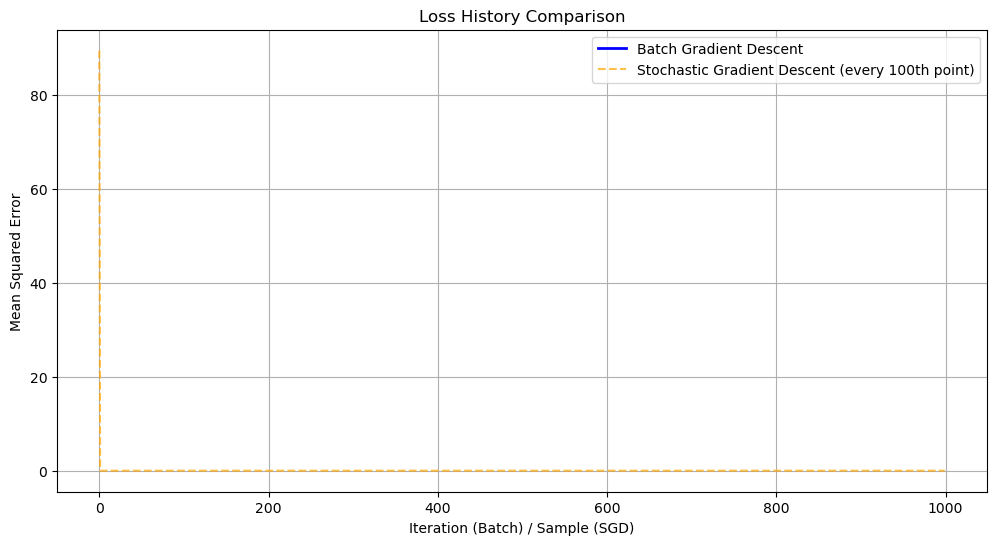

In [14]:
plt.figure(figsize=(12, 6))

# Batch GD loss (1000 points)
plt.plot(batch_model.loss_history, label='Batch Gradient Descent', color='blue', linewidth=2)

# SGD loss (1000*100=100,000 points, so we'll plot every 100th point for clarity)
plt.plot(sgd_model.loss_history[::100], label='Stochastic Gradient Descent (every 100th point)', 
         color='orange', alpha=0.7, linestyle='--')

plt.title('Loss History Comparison')
plt.xlabel('Iteration (Batch) / Sample (SGD)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

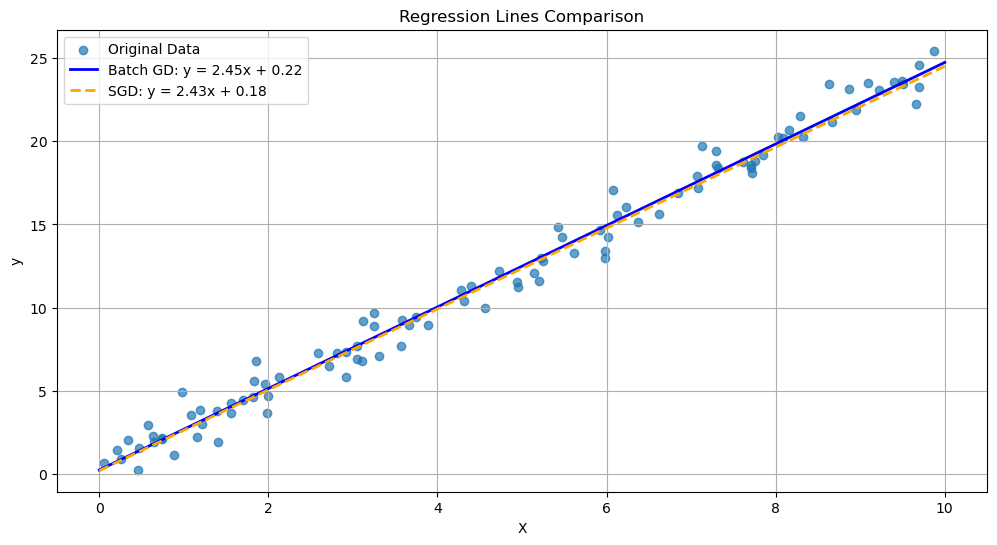

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Original Data', alpha=0.7)

# Batch GD prediction line
X_range = np.linspace(0, 10, 100)
y_batch = batch_weights[0][0] * X_range + batch_bias
plt.plot(X_range, y_batch, label=f'Batch GD: y = {batch_weights[0][0]:.2f}x + {batch_bias:.2f}', 
         color='blue', linewidth=2)

# SGD prediction line
y_sgd = sgd_weights[0][0] * X_range + sgd_bias
plt.plot(X_range, y_sgd, label=f'SGD: y = {sgd_weights[0][0]:.2f}x + {sgd_bias:.2f}', 
         color='orange', linestyle='--', linewidth=2)

plt.title('Regression Lines Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()